# Creating Generative Adversarial Network Using MNIST dataset

## Setup Dataset

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


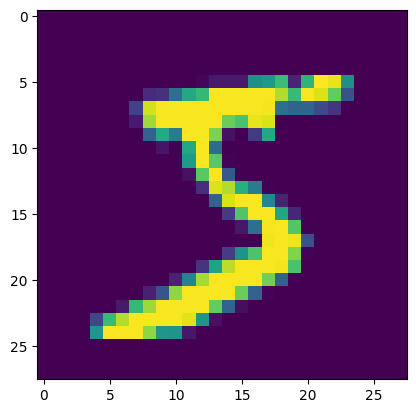

In [4]:
plt.imshow(X_train[0])

In [7]:
#creating smalled dataset from subset

only_zeros = X_train[y_train == 0]
only_zeros.shape

(5923, 28, 28)

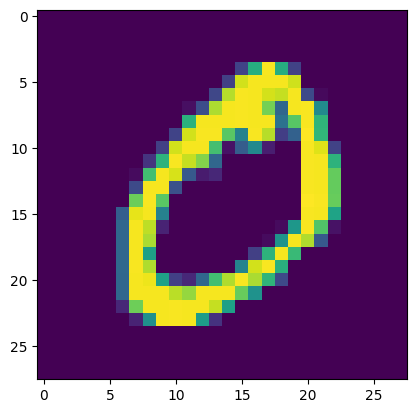

In [8]:
plt.imshow(only_zeros[0])

## Creating Generator and Discriminator

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Flatten

discriminator = Sequential()
discriminator.add(Flatten(input_shape=(28, 28)))
discriminator.add(Dense(150, activation='relu'))
discriminator.add(Dense(100, activation='relu'))
#final output layer
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer='adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [2]:
codings_size = 100
generator = Sequential()
generator.add(Dense(100, activation='relu', input_shape=[codings_size]))
generator.add(Dense(150, activation='relu'))
generator.add(Dense(28 * 28, activation='sigmoid'))
generator.add(Reshape([28, 28]))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
GAN = Sequential([generator, discriminator])
discriminator.trainable = False
GAN.compile(loss='binary_crossentropy', optimizer='adam')

In [8]:
batch_size = 32
my_dataset = only_zeros
dataset = tf.data.Dataset.from_tensor_slices(my_dataset).shuffle(buffer_size=1000)
type(dataset)

tensorflow.python.data.ops.shuffle_op._ShuffleDataset

In [9]:
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)


In [18]:
epochs = 100
generator , discriminator = GAN.layers

In [19]:
from re import X
# Training loop
for epoch in range(epochs):
  print(f"Currently on epoch {epoch+1}")
  for i, X_batch in enumerate(dataset):
      if i%30 == 0:
        print(f"\tCurrently on batch number {i+1}")

  # DISCRIMINATOR TRAINING

  noise = tf.random.normal(shape=[batch_size, codings_size])
  generated_images = generator(noise)

  # concatenate fake and real images in one array
  X_fake_vs_real = tf.concat([generated_images, tf.dtypes.cast(X_batch, tf.float32)], axis=0)

  # Labels for fake and true images, they are concatenated one after another
  y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)

  discriminator.trainable = True
  discriminator.train_on_batch(X_fake_vs_real, y1)


  # GANERATOR TRAINING

  noise = tf.random.normal(shape=[batch_size, codings_size])

  # making the discriminator "believe" that these images are real
  # all labels will be 1
  y2 = tf.constant([[1.]] * batch_size)
  discriminator.trainable = False
  GAN.train_on_batch(noise, y2)


Currently on epoch 1
	Currently on batch number 1
	Currently on batch number 31
	Currently on batch number 61
	Currently on batch number 91
	Currently on batch number 121
	Currently on batch number 151
	Currently on batch number 181


Currently on epoch 2
	Currently on batch number 1
	Currently on batch number 31
	Currently on batch number 61
	Currently on batch number 91
	Currently on batch number 121
	Currently on batch number 151
	Currently on batch number 181


Currently on epoch 3
	Currently on batch number 1
	Currently on batch number 31
	Currently on batch number 61
	Currently on batch number 91
	Currently on batch number 121
	Currently on batch number 151
	Currently on batch number 181
Currently on epoch 4
	Currently on batch number 1
	Currently on batch number 31
	Currently on batch number 61
	Currently on batch number 91
	Currently on batch number 121
	Currently on batch number 151
	Currently on batch number 181
Currently on epoch 5
	Currently on batch number 1
	Currently on batch number 31
	Currently on batch number 61
	Currently on batch number 91
	Currently on batch number 121
	Currently on batch number 151
	Currently on batch number 181
Currently on epoch 6
	Currently on batch number 1
	Currently on batch number 31
	Currently on batch number 61
	Currently on batch number 91
	Currently on batch number 121
	Currently on batch number 151
	Currently on batch number 181
Currently on epoch 7
	Currently on batch number 1
	Currently on batc

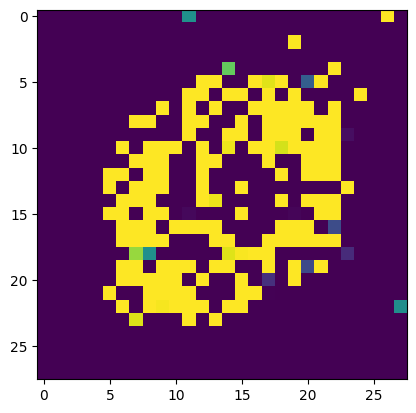

In [22]:
# Very prone to Mode Colapse :(
noise = tf.random.normal(shape=[batch_size, codings_size])
generated_images = generator(noise)
plt.imshow(generated_images[2])